<a href="https://colab.research.google.com/github/imranrahman1997/TensorFlow-Course/blob/master/Heart_disease_classification_with_nural_network_and_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to predict which patient will have a heart disease

In [1]:
# load important packages
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [2]:
train_path = "/content/drive/My Drive/Dataset/Heart disease/heart.csv"
df = pd.read_csv(train_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. age
2. sex
3. cp = chest pain(Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. trestbps = blood pressure
5. chol = cholesterol measurement
6. fbs = fasting blood sugar(1 = True, 0 = False)
7. restecg = resting electrocardiographic measurement(0 = normal, 1 = having  ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach = The person's maximum heart rate achieved

9. exang = Exercise induced angina (1 = yes; 0 = no)

10. oldpeak = ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope = the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca = The number of major vessels (0-3)

13. thal = A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target = Heart disease (0 = no, 1 = yes)

In [3]:
# describe
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There is no null value

#corelation
find out the corelation between dependant and indipendant freatures

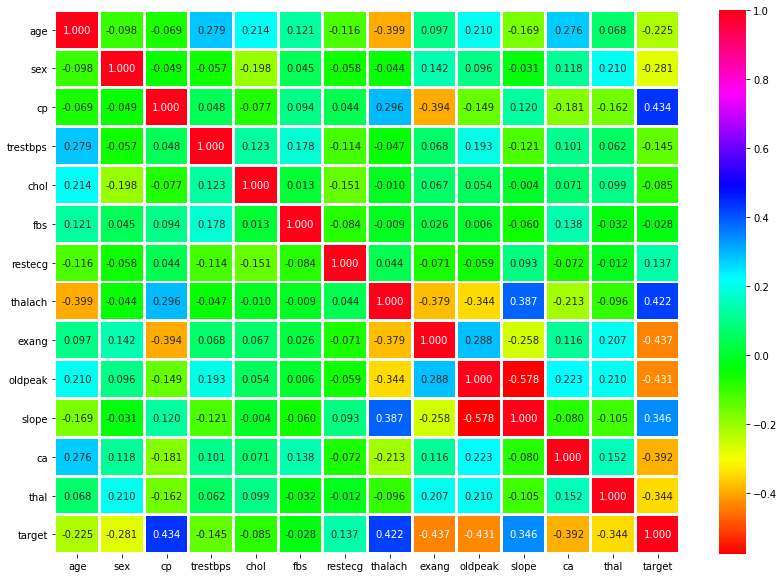

In [5]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'hsv', fmt = '.3f', linewidths = 2)
plt.show()

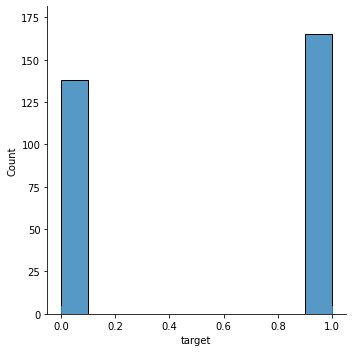

In [6]:
sns.displot(df['target'], rug = True)
plt.show()

In [7]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


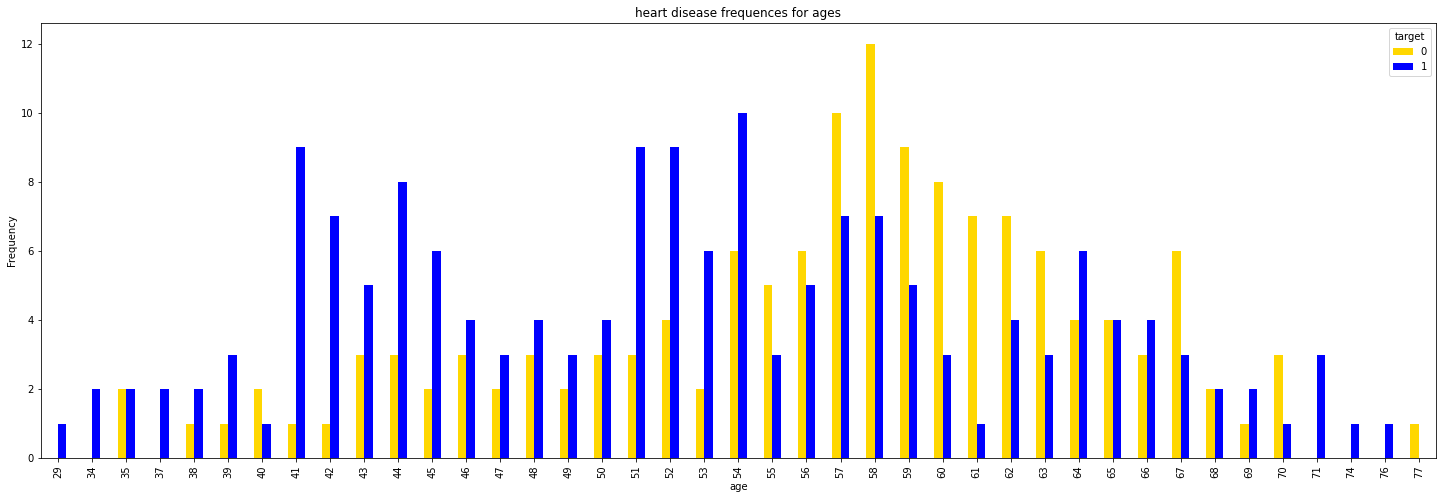

In [8]:
pd.crosstab(df.age, df.target).plot(kind = 'bar', figsize = (25, 8), color = ['gold', 'blue'])
plt.title("heart disease frequences for ages")
plt.xlabel("age")
plt.ylabel('Frequency')
plt.show()

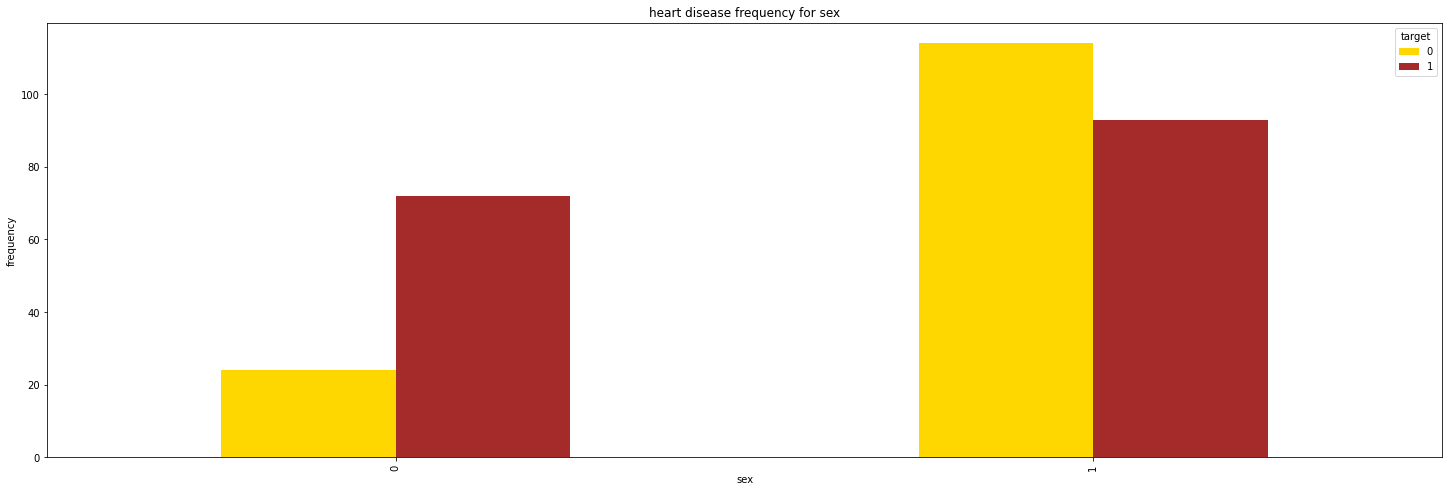

In [9]:
pd.crosstab(df.sex, df.target).plot(kind = "bar", figsize = (25,8), color = ["gold", "brown"])
plt.title("heart disease frequency for sex")
plt.xlabel('sex')
plt.ylabel("frequency")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relation of tresbps with target')

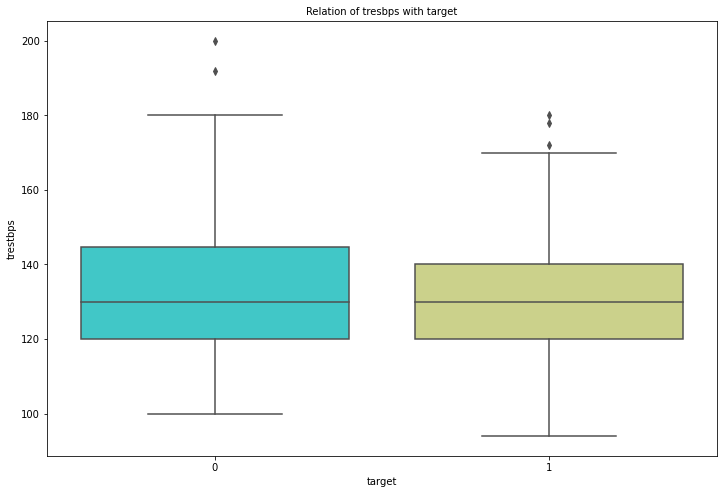

In [10]:
plt.figure(figsize = (12,8))
sns.boxplot(df['target'], df['trestbps'], palette = 'rainbow')
plt.title("Relation of tresbps with target", fontsize = 10)

The plot clearly suggests that the patients who are most likely to not suffer from the disease have a slighly greater blood pressure than the patients who have heart diseases.

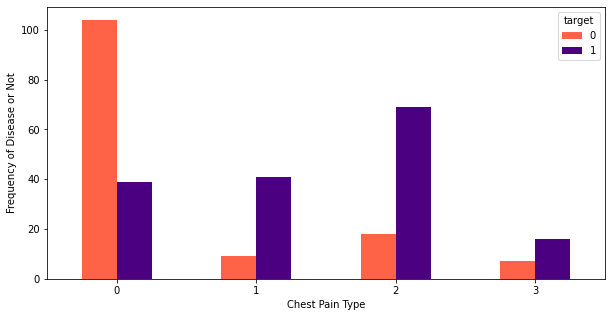

In [11]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=['tomato','indigo' ])
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

Effect of parameters on Heart disease based on Age

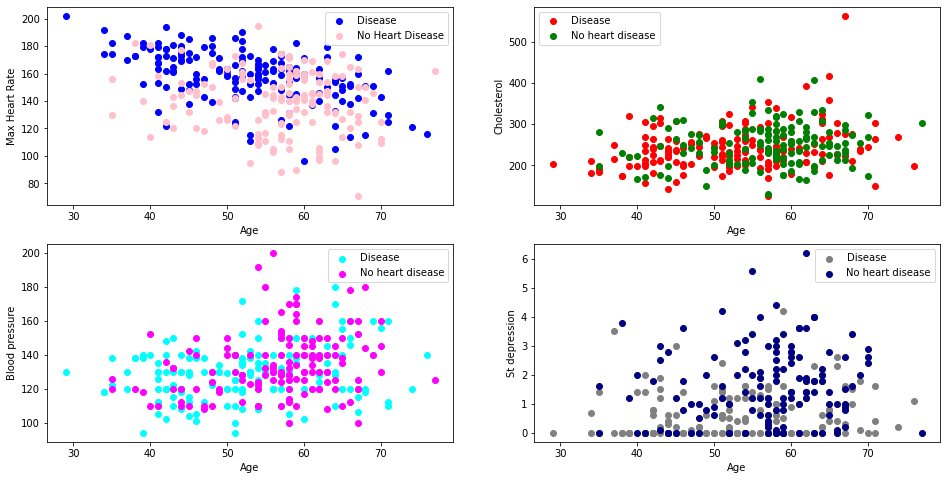

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
# age vs thalach 
plt.scatter(x = df.age[df.target == 1], y = df.thalach[df.target == 1], c = 'blue')
plt.scatter(x = df.age[df.target == 0], y = df.thalach[df.target == 0], c = 'pink')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Heart Disease"])

#age vs chol
plt.subplot(2,2,2)
plt.scatter(x = df.age[df.target == 1], y = df.chol[df.target == 1], c = 'red')
plt.scatter(x = df.age[df.target == 0], y = df.chol[df.target == 0], c = 'green')
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend(["Disease", "No heart disease"])

#age vs trestbps
plt.subplot(2,2,3)
plt.scatter(x = df.age[df.target == 1], y = df.trestbps[df.target == 1], c = 'cyan')
plt.scatter(x = df.age[df.target == 0], y = df.trestbps[df.target == 0], c = 'fuchsia')
plt.xlabel("Age")
plt.ylabel("Blood pressure")
plt.legend(['Disease', "No heart disease"])

#age vs oldpeak
plt.subplot(2,2,4)
plt.scatter(x = df.age[df.target == 1], y = df.oldpeak[df.target == 1], c = 'grey')
plt.scatter(x = df.age[df.target == 0], y = df.oldpeak[df.target == 0], c = 'navy')
plt.xlabel("Age")
plt.ylabel('St depression')
plt.legend(["Disease", "No heart disease"])
plt.show()

# Creating Dummy Variable
Categorical data need to transform into numeric data.Dummy variable creats a new variable containing 0 and 1.
In this dummy variable we comvert numeric values like 1,2,3,4... into numeric 0 and 1.

In [13]:
# cp has 4 values. from dummies we convert it into 0 and 1 numeric value
#creat a new variable called chest_pain
chest_pain = pd.get_dummies(df['cp'], prefix='cp', drop_first=True)
#Concate new variable as new freature
df = pd.concat([df, chest_pain], axis = 1)
#drop cp which ensure not doubling same freatures value
df.drop(['cp'],axis=1,inplace=True)

#creat dummy for slop
sp = pd.get_dummies(df['slope'], prefix = 'slope')
# creat dummy for thal
th = pd.get_dummies(df['thal'], prefix = 'thal')
# creat dummy for restecg
rest_ecg = pd.get_dummies(df['restecg'], prefix='restecg')

#make a frame of sp, th, rest_ecg
frames = [df, sp, th, rest_ecg]
#concate frame with existing data frame
df = pd.concat(frames, axis = 1)

#drop slope, thal, restecg
df.drop(['slope', 'thal', 'restecg'], axis = 1, inplace=True)

In [14]:
df.head(5)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0


Divide the dataset into dependent and indipendant labels

In [15]:
x = df.drop(['target'], axis = 1)
y = df.target.values #target label

#Split dataset

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Normalize data

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Importing the Keras libraries and packages

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten
from keras.layers import Dense
from keras.layers import Input
import warnings


# Build an Artificial Nural Network


In [19]:
model = Sequential()
model.add(Input(shape = (x_train.shape[1],)))
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

**Input shape:** Freatures number of x_train

**Dense layer:** Here unit number is Nuron number. 10 indicates there are 10 neuron. There are two Dense net, it means there are 2 nodes. 

# Model compile

In [20]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# Fitting model

In [21]:
history = model.fit(x_train, y_train,
                    batch_size = 10,
                    validation_data = (x_test, y_test),
                    validation_batch_size = 10,
                    epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 7ms/step - loss: 0.8156 - accuracy: 0.5248 - val_loss: 0.7435 - val_accuracy: 0.5410
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7342 - accuracy: 0.5372 - val_loss: 0.6794 - val_accuracy: 0.5410
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.5579 - val_loss: 0.6272 - val_accuracy: 0.5574
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6280 - accuracy: 0.6157 - val_loss: 0.5854 - val_accuracy: 0.5902
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5912 - accuracy: 0.6694 - val_loss: 0.5495 - val_accuracy: 0.6230
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5600 - accuracy: 0.7521 - val_loss: 0.5263 - val_accuracy: 0.6885
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.7727 - val_loss: 0.5018 - val_accuracy: 0.6885
Epoch 8/100
2

#Plot 

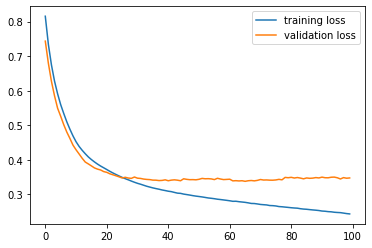

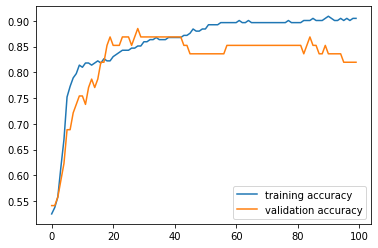

In [22]:
# training and validation loss
plt.plot(history.history['loss'], label = "training loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.legend()
plt.show()

#Training and validation score
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

Predict test

In [23]:
y_pred = model.predict(x_test)

#Confusion matrix (ANN)

model accuracy is : 0.819672131147541


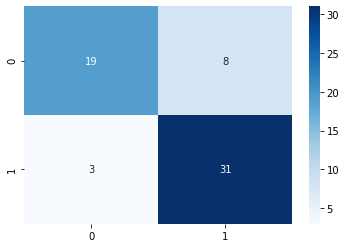

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot = True, cmap = "Blues", fmt = 'd', cbar = True)
#accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred.round())
print("model accuracy is :" , ac)

# Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rdf_c = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#fitting random forest
rdf_c.fit(x_train, y_train)

#predict
rdf_pred = rdf_c.predict(x_test)

#Confusion matrics (Random Forest)

Random Forest accuracy: 0.8032786885245902


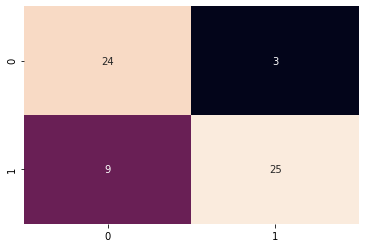

In [26]:
rdf_cm = confusion_matrix(y_test, rdf_pred)
sns.heatmap(rdf_cm, annot = True, fmt = "d", cbar = False)
#accuracy
rdf_ac = accuracy_score(rdf_pred, y_test)
print("Random Forest accuracy:", rdf_ac)

#ROC and AUC

In [27]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
%matplotlib inline

<Figure size 432x288 with 0 Axes>

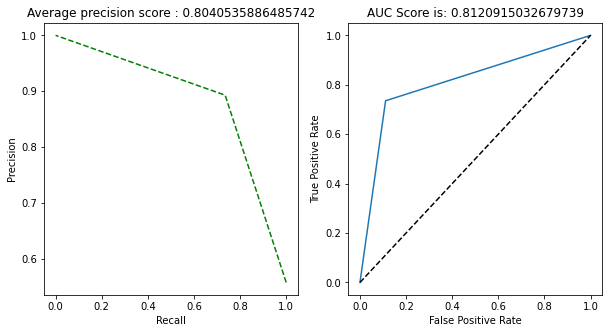

<Figure size 432x288 with 0 Axes>

In [28]:
def ploting(true, pred):
  fig,ax=plt.subplots(1,2,figsize=(10,5)) # 1 row, 2 columns, size 10:5
  precision,recall,threshold = precision_recall_curve(true,pred) #compute precision and recal ration
  ax[0].plot(recall,precision, 'g--') # creat a line joining percision recall point
  ax[0].set_xlabel("Recall")
  ax[0].set_ylabel("Precision")
  ax[0].set_title("Average precision score : {}".format(average_precision_score(true, pred))) #Compute average precision from prediction scores

  fpr,tpr,threshold = roc_curve(true,pred)
  ax[1].plot(fpr,tpr)
  ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
  ax[1].plot([0,1],[0,1],'k--')
  ax[1].set_xlabel('False Positive Rate')
  ax[1].set_ylabel('True Positive Rate')
ploting(y_test, rdf_c.predict(x_test))
plt.figure()

True positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold.
A good model auc must be gratter than 0.5

#Compair both model accuracy

Random Forest accuracy 0.8032786885245902 and Nural Net Accuracy 0.819672131147541


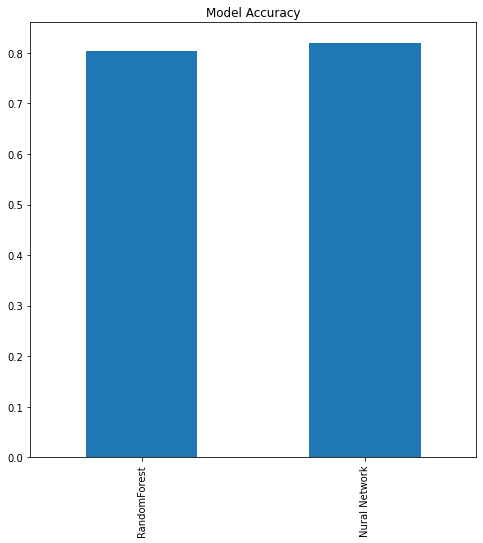

In [29]:
model_accuracy = pd.Series(data = [rdf_ac, ac], 
                           index = ['RandomForest', "Nural Network"]) # rdf = random forest accuracy, ac = nural net accuracy
fig = plt.figure(figsize = (8, 8))
model_accuracy.sort_values().plot.bar()
plt.title("Model Accuracy")
print('Random Forest accuracy {} and Nural Net Accuracy {}'.format(rdf_ac, ac))

#Conclusion
From this two model our Artificial Nural Network model gives higher accuracy than Random Forest